# 📚 Import Dependencies 📦


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import  Counter
import nltk
import pickle
import string


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ap\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ap\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
# Importing Dataset
df = pd.read_csv("spam.csv", encoding="latin-1")

In [11]:
df.sample(1)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4393,ham,Baaaaaaaabe! Wake up ! I miss you ! I crave yo...,NaN,NaN,NaN


In [13]:
# Dataset with required features only
df = pd.read_csv("spam.csv", encoding="latin-1", usecols=["v1","v2"])

In [14]:
df.sample(5)

,v1,v2
4584,spam,U have a Secret Admirer who is looking 2 make ...
1708,ham,How's my loverboy doing ? What does he do that...
4357,spam,Our dating service has been asked 2 contact U ...
4671,spam,Customer service announcement. We recently tri...
806,ham,"sure, but make sure he knows we ain't smokin yet"


# 🔢 Data Preprocessing 🔄


In [15]:
# Rename the Features
df.rename(columns={"v1": "output","v2": "input"}, inplace = True)

In [16]:
df.sample(1)

,output,input
3243,ham,Squeeeeeze!! This is christmas hug.. If u lik ...


# 🏷️ Label Encoder 🏷️


In [17]:
# Encoding Target Feature 
le = LabelEncoder()
df["output"] = le.fit_transform(df["output"])

In [18]:
df.sample(1)

,output,input
3089,0,Am going to take bath ill place the key in win...


# 📊 Exploratory Data Analysis 📊


In [19]:
# Shape of the Dataset
df.shape

(5572, 2)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   output  5572 non-null   int32 
 1   input   5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [21]:
# Check Null Values
df.isnull().sum()

output    0
input     0
dtype: int64

In [22]:
# Check Duplicate Values
df.duplicated().sum()

403

In [23]:
# Drop Duplicates
df = df.drop_duplicates(keep="first")

In [24]:
df.shape

(5169, 2)

In [25]:
df.head()

,output,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
# Ham & Spam Counts
df["output"].value_counts()

output
0    4516
1     653
Name: count, dtype: int64

# 🥧 Pie Chart 📈


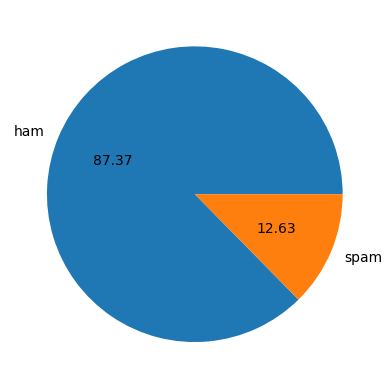

In [27]:
plt.pie(df["output"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show()

# Obsrevations:
- Data is Imblanced
- Having Less Spam Messages in Dataset

# 🔧 Feature Engineering 🔧


# ➕ Feature Construction: New Features ➕


In [28]:
# Total No. of Characters in Data
df["characters"] = df["input"].apply(len)

In [29]:
# Total No. of Words in Data
df["word"] = df["input"].apply(lambda x:len( nltk.word_tokenize(x)))

In [30]:
# Total No. of Sentence
df["sentence"] = df["input"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head(1)

,output,input,characters,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [32]:
# Statistical Analysis of new features
df[["characters","word", "sentence"]].describe()

,characters,word,sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# Statistical Analysis for HAM Data
df[df["output"]==0][["characters","word", "sentence"]].describe()


,characters,word,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# Statistical Analysis for SPAM Data
df[df["output"] ==1][["characters","word", "sentence"]].describe()

,characters,word,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


# 📊 Histogram Plot 📊


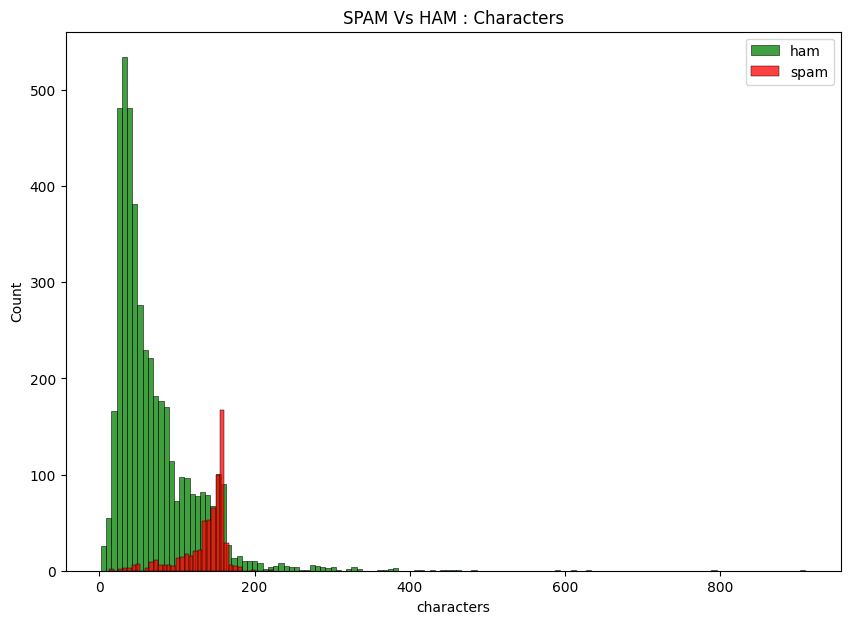

In [35]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["output"]==0]["characters"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["characters"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Characters")
plt.legend()
plt.show()

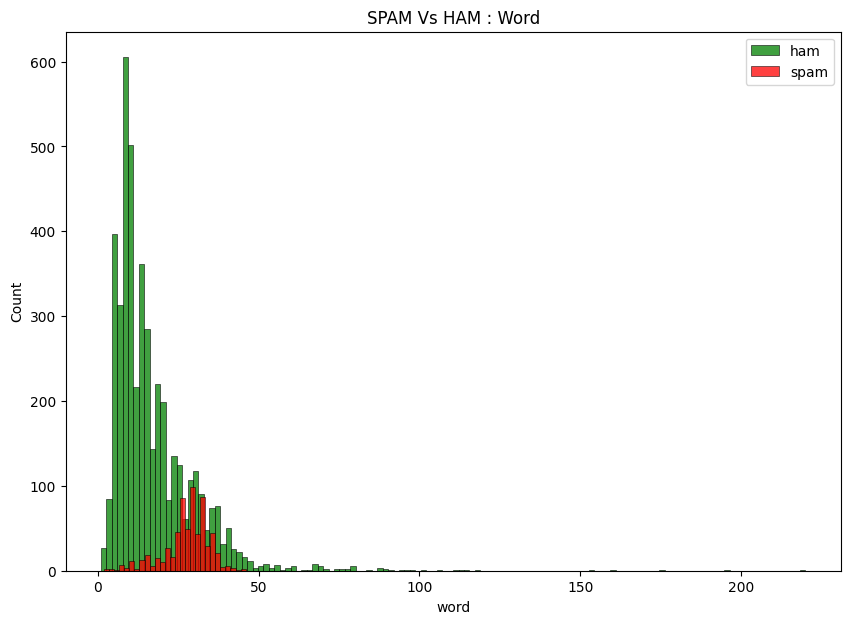

In [36]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["output"]==0]["word"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["word"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Word")
plt.legend()
plt.show()

# Observations:
- Ham Characters and Words are more than Spam

# 🌌 Pair Plot 🌌


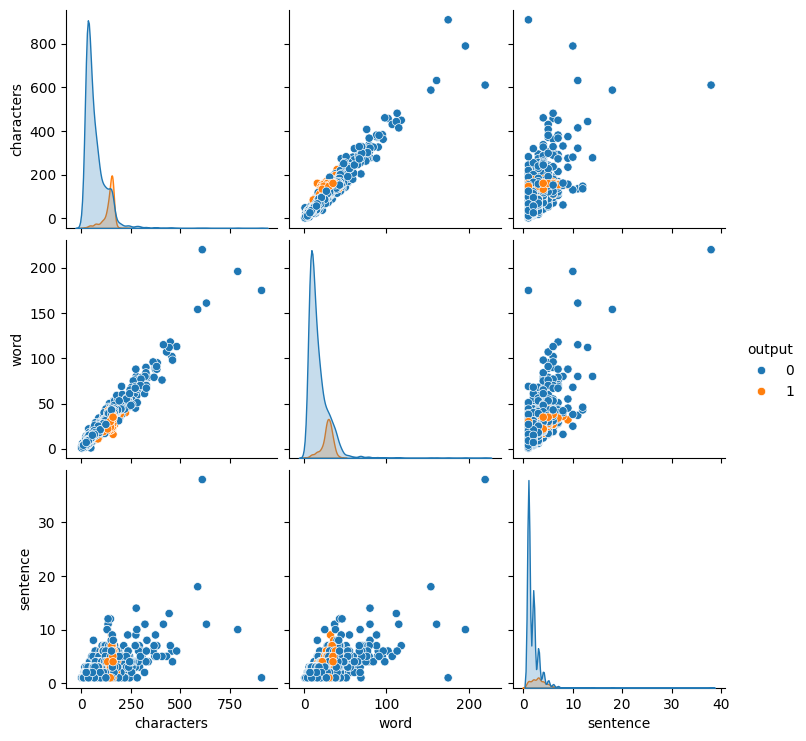

In [37]:
sns.pairplot(df,hue="output")

# Observations:
- Outliers are present 

# 🌡️ Heatmap 🌡️


In [43]:
df[["characters","word", "sentence"]]

,characters,word,sentence
0,111,24,2
1,29,8,2
2,155,37,2
3,49,13,1
4,61,15,1
...,...,...,...
5567,161,35,4
5568,37,9,1
5569,57,15,2
5570,125,27,1


In [44]:
# Correlations between features
df[["characters","word", "sentence"]].corr()

,characters,word,sentence
characters,1.000000,0.965760,0.624139
word,0.965760,1.000000,0.679971
sentence,0.624139,0.679971,1.000000


<Axes: >

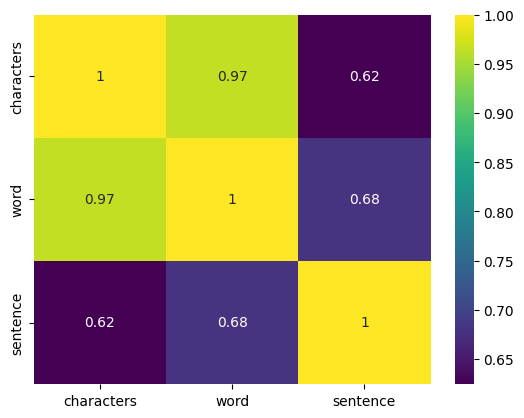

In [45]:
sns.heatmap(df[["characters","word", "sentence"]].corr(),annot=True,cmap="viridis")

# Observations:
- "Characters" and "Word" have a moderately strong positive correlation of 0.965307

In [46]:
# Intilizing Porter Stemmer Class
ps = PorterStemmer()

In [47]:
# This Function helps to get Ready!!!

def data(text):
    text = text.lower()               #  Converts Text in Lower Case
    text = nltk.word_tokenize(text)   #  Breaks Text in Words 
    
    y = []
    for i in text:
        if i.isalnum():               #  Removing Special Characters
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:                    #  Removing Stopwords and Punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:                    #  Porter Stemmer removing unwanted words
        y.append(ps.stem(i))
        
    return " ".join(y)

In [48]:
# Checking data function 
data("shree ram 🚩 and shree mahakaleshawar 🔱 are everything for me")

'shree ram shree mahakaleshawar everyth'

In [49]:
df.sample(2)

,output,input,characters,word,sentence
1940,0,Dude avatar 3d was imp. At one point i thought...,124,26,2
609,0,"It's fine, imma get a drink or somethin. Want ...",66,18,2


In [50]:
# Transforming dataset using the "data" function in new column "new_data"
df["new_data"] = df["input"].apply(data)

In [51]:
df.sample(5)

,output,input,characters,word,sentence,new_data
3506,0,Two fundamentals of cool life: \Walk,36,7,1,two fundament cool life
1041,0,I'm in class. Will holla later,30,8,2,class holla later
2111,0,Yar he quite clever but aft many guesses lor. ...,147,35,3,yar quit clever aft mani guess lor got ask 2 b...
3313,0,Oh gei. That happend to me in tron. Maybe ill ...,70,19,3,oh gei happend tron mayb ill dl 3d
3383,1,FREE MSG:We billed your mobile number by mista...,160,27,1,free msg bill mobil number mistak shortcod cal...


# 🌫️ Word Cloud ☁️


In [52]:
wc = WordCloud(
    background_color=None,
    width=800,
    height=400
)

In [53]:
# Wordcloud for SPAM
spam_wc = wc.generate(df[df["output"] ==1]["new_data"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc = wc.generate(df[df["output"] ==0]["new_data"].str.cat(sep=" "))

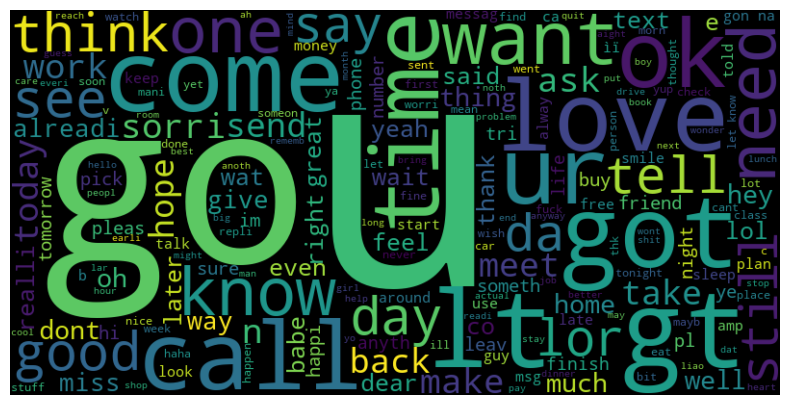

In [54]:
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

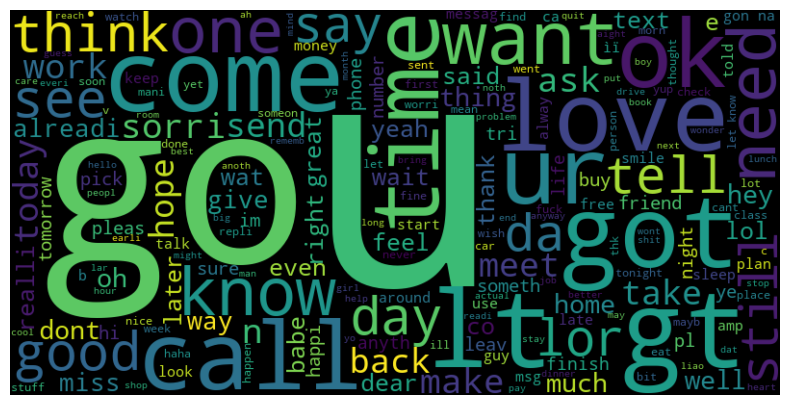

In [55]:
# HAM
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [56]:
# Spliting SPAM Sentences in Words
spam_corpus = []
for msg in df[df["output"]==1]["new_data"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# 📊 Bar Plot 📊


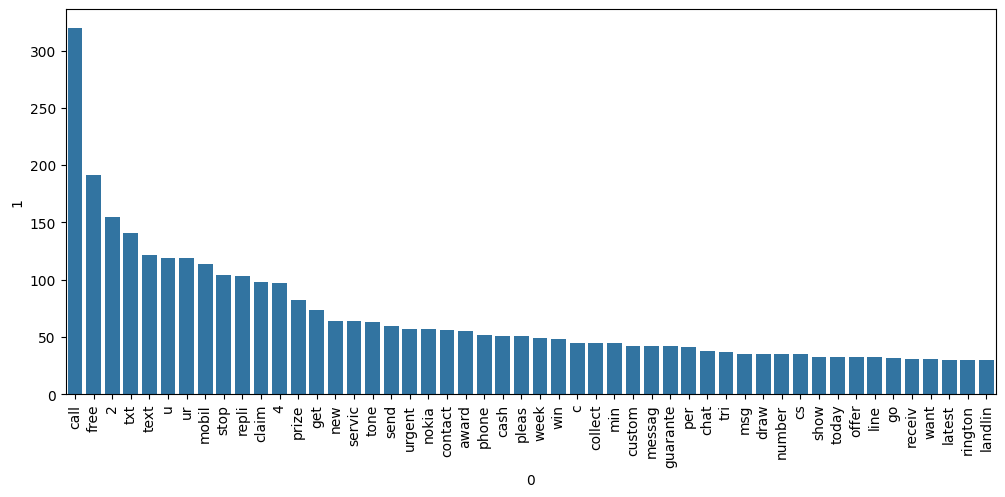

In [57]:
# Top 50 SPAM Words
a=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

In [58]:
# Spliting HAM Sentences in Words
ham_corpus = []
for msg in df[df['output'] == 0]['new_data'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

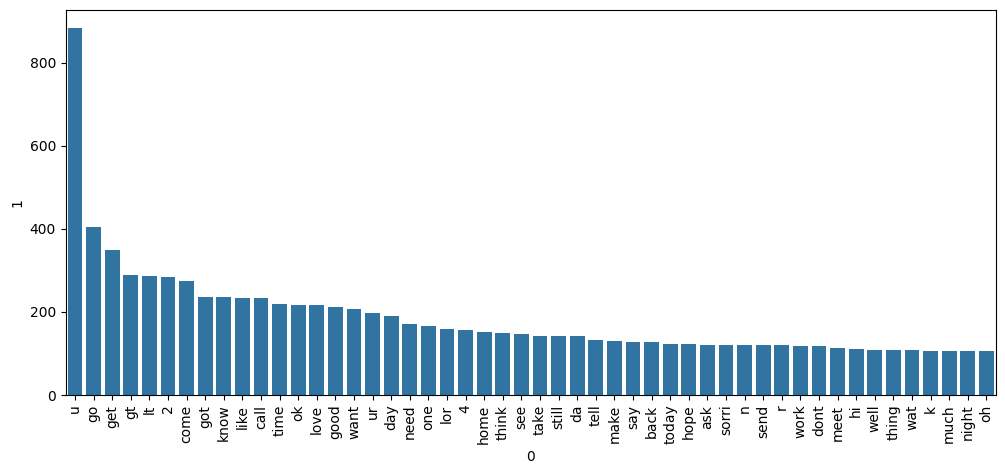

In [59]:
# Top 50 HAM Words
a=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

# 🔤 Vectorization 🔤


In [60]:
# Initilizing TFIDF Vectorizer
tfidv = TfidfVectorizer(max_features=3000)

In [61]:
# Independent Feature
X = tfidv.fit_transform(df["new_data"]).toarray()

In [62]:
# Dependent Feature
y = df["output"].values

In [63]:
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# 🎓 Models Training 🤖


In [64]:
# Models that are going to be trained
models={
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB(),
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Bagging CLF" : BaggingClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "Ada Boost" : AdaBoostClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGB" : XGBClassifier(),
    "XGBRF" : XGBRFClassifier()
}

In [65]:
# Creating a function train each model and calculate/return accuracy and precision
def train_clf (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    
    return acc, pre

In [67]:
# A FOR loop Calls "traim_clf" for each model and stores accuracy and precision
acc_s=[]
pre_s=[]

for name, model in models.items():
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
    
    acc_s.append(accuracy)
    pre_s.append(precision)

In [68]:
# As Precision matter over Accuracy in this Data, Sorting in DESC order of Precision. All Scores of Models

scores_df = pd.DataFrame({"Algorithm": models.keys(), 
                          "Accuracy": acc_s, 
                         "Precision": pre_s}).sort_values(by="Precision", ascending=False)

# 📈 Algorithms: Accuracy and Precision 🎯


In [69]:
scores_df

,Algorithm,Accuracy,Precision
1,Multinomial NB,0.970986,1.000000
6,KNN,0.905222,1.000000
2,Bernoulli NB,0.983559,0.991870
4,SVC,0.972921,0.982456
3,Logistic Regression,0.956480,0.979381
9,ETC,0.976789,0.975000
8,Random Forest,0.974855,0.974576
10,Ada Boost,0.961315,0.945455
11,Gradient Boost,0.957447,0.943396
12,XGB,0.971954,0.943089


# Observations:
- Multinomial NB has an accuracy of 97.29% and a precision of 100.00%.
- KNN (K-Nearest Neighbors) has an accuracy of 90.52% and a precision of 100.00%.
- Bernoulli NB has an accuracy of 98.16% and a precision of 99.17%.
- ETC (Extra Trees Classifier) has an accuracy of 97.97% and a precision of 98.35%.
- Random Forest has an accuracy of 97.49% and a precision of 98.28%.
- SVC (Support Vector Classifier) has an accuracy of 97.10% and a precision of 97.37%.
- Logistic Regression has an accuracy of 95.16% and a precision of 96.81%.
- Gradient Boost has an accuracy of 95.74% and a precision of 94.34%.
- XGB (Extreme Gradient Boosting) has an accuracy of 97.10% and a precision of 94.26%.
- Ada Boost has an accuracy of 96.42% and a precision of 93.16%.
- Bagging CLF (Classifier) has an accuracy of 95.36% and a precision of 87.50%.
- XGBRF (XGBoost Random Forest) has an accuracy of 94.00% and a precision of 87.25%.
- Decision Tree has an accuracy of 94.39% and a precision of 80.77%.
- Gaussian NB (Naive Bayes) has an accuracy of 86.75% and a precision of 50.22%.

# 📊 Scores Bar Plot 📊


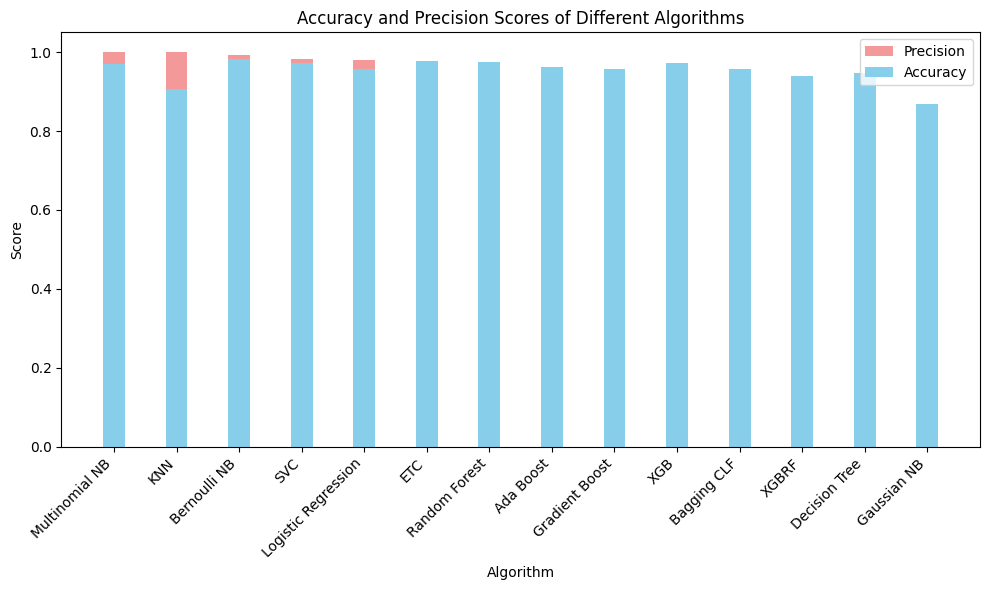

In [70]:
# Graph Accuracy and Precision

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(scores_df["Algorithm"], scores_df["Precision"], width=bar_width, label="Precision", color='lightcoral', alpha=0.8)
plt.bar(scores_df["Algorithm"], scores_df["Accuracy"], width=bar_width, label="Accuracy", color='skyblue')
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Accuracy and Precision Scores of Different Algorithms")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Observations:
- Models with high precision scores, such as Multinomial NB (100.00%), KNN (100.00%), and Bernoulli NB (99.17%), have a high ability to correctly identify positive instances.
- Models with high accuracy scores, such as Bernoulli NB (98.16%) and Random Forest (97.49%), make accurate overall predictions on the dataset.

In [71]:
# Hence Multinomial Naïve Bayes give excellent precision and accuracy scores.
# According to me MNB is sutaible for Model

mnb=MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

# 📌 Pickle Files 📌

In [72]:
# Pickle files help in Model Deployment

pickle.dump(mnb,open("model.pkl","wb"))
pickle.dump(tfidv, open("tfidf.pkl","wb"))
pickle.dump(data,open("fun.pkl","wb"))